**ch3. Gaussian Process**

## Linear Regression (radial basis function regression) and Curse of Dimensionality

For example, when think one demensional vector $\mathbf{x}$ and feature vector $\phi(\mathbf{x})=(1,x,x^2,x^3)^T$,  cubic function $y$ of $\mathbf{x}$ is formulated using weigh $\mathbf{w}=(w_0,w_1,w_2,w_3)^T$ as
$$
\begin{eqnarray}
y &= &w_0+w_1x_1+w_2x_2+w_3x_3\\
   &=&\mathbf{w}^T\phi(\mathbf{x})\\
\end{eqnarray}
$$
If use basis function according to gaussian distribution, i.e.
$$
\phi_h(x)=exp\left(-\frac{(x-\mu_h)^2}{\sigma^2}\right)\\
$$
and set above $\mu_h\in(-H,...,-2,-1,0,1,2,...,H)$ and weight by $w_h\in\mathbb{R}$, $y$ is formulated as
$$
y = \sum_{n=-H}^{H}w_hexp\left(-\frac{(x-\mu_h)^2}{\sigma^2}\right)\\
$$
This way is named as **radial basis function regression**. At a glance, this way seems well, but it has critical issue. In one dimension, size of $\mu_h$ is $2H+1$, and in two demension, size of $\mu_h$ is $(2H+1)^2$. As number of dimension increasing, dimension of $\mathbf{w}$ is larger, and finally become to can not calcurate accurate. This problem is named as **Curse of Dimensionality**.

## Gaussian Process

### Gaussian Process

How should solve this problem? The solution is to take expected value of w and delete w from model  by integrating. Consider the following conditions,
$$
y =\Phi\mathbf{w}\\
w\sim\mathcal{N}(\mathbf{0},\lambda^2\mathbf{I})
$$
They meen **${y}$ is that vector $w$ according to gauusian distribution transformed by constant matrix $\Phi$**. So, $y$ is according to gaussian distribution too. For this, expected value $\mathbb{E}[\mathbf{y}]$ and $\Sigma$ is formulated as
$$
\mathbb{E}[\mathbf{y}]=\mathbb{E}[\Phi\mathbf{w}]=\Phi\mathbb{E}[\mathbf{w}]=0\\
\begin{eqnarray}
\Sigma&=&\mathbb{E}[\mathbf{yy}^T]-\mathbb{E}[\mathbf{y}]\mathbb{E}[\mathbf{y}^T]\\
&=&\mathbb{E}[(\Phi\mathbf{w})(\Phi\mathbf{w})^T]\\
&=&\Phi\mathbb{E}[\mathbf{ww}^T]\Phi^T\\
&=&\lambda^2\Phi\Phi^T
\end{eqnarray}
$$
As a result, distribution of $\mathbf{y}$ is according to multiple gaussian distribution
$$
\mathbf{y}\sim\mathcal{N}(\mathbf{0},\lambda^2\Phi\Phi^T)=\mathcal{N}(\mathbf{0},\mathbf{K})
$$
This relation is **named Gaussian** Process, and it means **gaussian distribution of infinite dimension** i.e.  **if $\mathbf{w}$ is according to gaussian distribution, $\mathbf{y}$ is according to Gaussian Process.** 

### Kernel Trick (Kernel function) 

Distribution of $y$ is determined only by covariance matrix $\mathbf{K}$'s component, i.e.
$$
K_{nn'}=\phi(\mathbf{x}_n)^{\mathrm{T}}\phi(\mathbf{x}_{n'})\\
$$
If can know $K_{nn'}$' s value in advance, do not have to calculate $\phi(\mathbf{x})$. Therefore, the function which gives $K_{nn'}$' s value is named **kernel function of $\mathbf{x}_n$ and $\mathbf{x}_{n'}$** and is represented as
$$
k(\mathbf{x}_n,\mathbf{x}_{n'})=\phi(\mathbf{x}_n)^{\mathrm{T}}\phi(\mathbf{x}_{n'})\\
$$
and covariance matrix $\mathbf{K}$ is named as **kernel matrix** or **Gram matrix of $\Phi$**. For kernel function example, **polynomial kernel** which is formulated as
$$
k(\mathbf{x},\mathbf{x}')=(\mathbf{x}^{\mathrm{T}}\mathbf{x}'+1)^2
$$
If $\mathbf{x}=(x_1,x_2)^{\mathrm{T}}$ and $\mathbf{x}'=(x_1',x_2')^{\mathrm{T}}$,
$$
\begin{eqnarray}
k(\mathbf{x},\mathbf{x}')&=&(x_1x_1'+x_2x_2'+1)^2\\
&=&x_1^2x_1'^2+x_2^2x_2'^2+2x_1x_2x_1'x_2'+2x_1x_1'+2x_2x_2'+1\\
&=&(x_1^2,x_2^2,\sqrt{2}x_1x_2,\sqrt{2}x_1,\sqrt{2}x_2,1)\cdot(x_1'^2,x_2'^2,\sqrt{2}x_1'x_2',\sqrt{2}x_1',\sqrt{2}x_2',1)
\end{eqnarray}
$$
So, it meens feature vector $\phi(\mathbf{x})=(x_1^2,x_2^2,\sqrt{2}x_1x_2,\sqrt{2}x_1,\sqrt{2}x_2,1)$. Avoiding represent feature vector $\phi(\mathbf{x})$ directly and calculating inner product only by kernel function is named as **kernel trick**.

Note: In some kernel function, feature vector $\phi(\mathbf{x})$ is infinite demension. But using kernel function, can calculate kernel matrix easily without representing feature vector $\phi(\mathbf{x})$ directly.

### Accurate definition of Gaussian Process

When In any nature number $N$, input vector $\mathbf{x}_1,\mathbf{x}_2,...,\mathbf{x}_N\in\chi$ correspond output vector
$$
\mathbf{f}=(f(\mathbf{x}_1),f(\mathbf{x}_2),...,f(\mathbf{x}_N))
$$
and $\mathbf{f}$ is according to $\mathcal{N}(\boldsymbol{\mu},\mathbf{K})$, $\mathbf{f}$ is called as $\mathbf{f}$ **is according to gaussian process** and represetnted as
$$
\mathbf{f}\sim GP(\mu(\mathbf{x}),k(\mathbf{x},\mathbf{x}'))
$$

### Sampling from Gaussian Process

The most used kernel to measure the similarity of input vector $\mathbf{x}$ is named as **Gaussian kernel** or **RBF (radial basis function) kernel** and formulated as 
$$
k(\mathbf{x},\mathbf{x}')=\theta_1exp\left(-\frac{|\mathbf{x}-\mathbf{x}'|^2}{\theta_2}\right)
$$
$\theta_1,\theta_2\in\mathbb{R}$ is parmeter to determin the feature of kernel function.\
For easy example, think about  $\mathbf{x}=(x_1,x_2,x_3,x_4)=(1,2,3,4)$ , $\theta_1=1,\theta_2=1$, and then use RBF kernel. What kind of schokastic distribution will be sampled in this time?

In [158]:
from tqdm import tqdm
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

In [101]:
def rbf_kernel(x1, x2, theta1, theta2):
    k = theta1*math.exp(-1/theta2*(np.linalg.norm([x1-x2], ord=2))**2)
    return k

kernael matirx K is


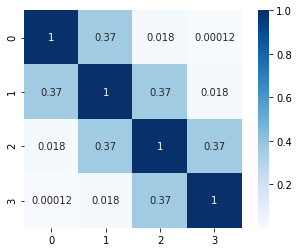

In [102]:
# calculate kernel matrix K using RBF kernel
x = [1, 2, 3, 4]
K = np.zeros((len(x),len(x)))
for i in range(len(x)):
    for j in range(len(x)):
        K[i][j] = rbf_kernel(x[i], x[j], theta1=1, theta2=1)
print('kernael matirx K is')
sns.heatmap(K, annot=True, cmap='Blues', square=True)

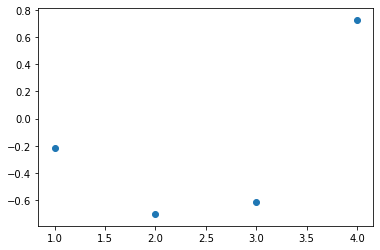

In [103]:
# sampling
L = np.linalg.cholesky(K)
u = np.random.normal(loc=0, scale=1, size=4).reshape(len(x), 1)
f = np.dot(L, u)
plt.scatter(x, f)

well... it seems not to good distribution. Then, What happens when engrave from 1 to 4 at intervals at 0.2.

kernael matirx K is


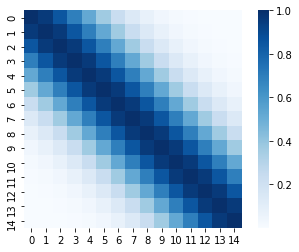

In [104]:
# calculate kernel matrix K using RBF kernel
x = np.arange(1,4,0.2)
K = np.zeros((len(x),len(x)))
for i in range(len(x)):
    for j in range(len(x)):
        K[i][j] = rbf_kernel(x[i], x[j], theta1=1, theta2=1)
print('kernael matirx K is')
sns.heatmap(K, annot=False, cmap='Blues', square=True)

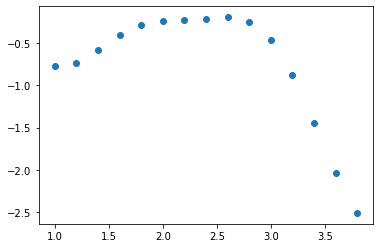

In [105]:
# sampling
L = np.linalg.cholesky(K)
u = np.random.normal(loc=0, scale=1, size=len(x)).reshape(len(x), 1)
f = np.dot(L, u)
plt.scatter(x, f)

Intervals 0.2 is seems to more like to curving. These dots is a 'one sample' from high dimensional gaussian distribution. In actually, sample $\mathbf{f}$ from gaussian distribution has infinite dots(i.e. infinite dimensionality) and if line up, it forms curving. **When takes out some of them , it will look like the above example**.\
In case of $\mathbf{x}$ is 2 dimensionality, sample from gaussian process forms curved surface.

### some Kernels

Else of rbf kernel, there are some kernels which represent nears of $\mathbf{x}$ with $\mathbf{x}'$. for example,
+ Gaussian Kernel (RBF Kernel)
$$
k(\mathbf{x},\mathbf{x}')=\theta_1exp\left(-\frac{|\mathbf{x}-\mathbf{x}'|^2}{\theta_2}\right)
$$
+ Linear Kernel (i.e. $\phi(\mathbf{x})=\mathbf{x}$)
$$
k(\mathbf{x},\mathbf{x}')=\mathbf{x}^\mathrm{T}\mathbf{x}'
$$
+ Exponential Kernel
$$
k(\mathbf{x},\mathbf{x}')=exp\left(-\frac{|\mathbf{x}-\mathbf{x}'|}{\theta}\right)
$$
+ Periodic Kernel
$$
k(\mathbf{x},\mathbf{x}')=exp\left(\theta_1cos\left(\frac{|\mathbf{x}-\mathbf{x}'|}{\theta_2}\right)\right)
$$

In [183]:
from numpy.random import multivariate_normal as mvnrand
from pylab import *

In [184]:
def let (val, func):
    return func(val)

#comment  
  
def klinear ():
    b = randn()
    return lambda x,y: b + x * y

def kexp (sigma):
    return lambda x,y: exp (- abs(x - y) / sigma)

def kgauss (params):
    [tau,sigma] = params
    return lambda x,y: exp(tau) * exp (-(x - y)**2 / exp(sigma))

def kperiodic (params):
    [tau,sigma] = params
    return lambda x,y: exp (tau * cos ((x - y) / sigma))

def kmatern3 (sigma):
    return lambda x,y: \
        let (abs(x - y), lambda r:
             (1 + sqrt(3) * r / sigma) * exp (- sqrt(3) * r / sigma))

def kmatern5 (sigma):
    return lambda x,y: \
        let (abs(x - y), lambda r:
             (1 + sqrt(5) * r / sigma + 5 * r * r / (3 * sigma * sigma))
             * exp (- sqrt(5) * r / sigma))

def kernel_matrix (xx, kernel):
    N = len(xx)
    eta = 1e-6
    return np.array (
        [kernel (xi, xj) for xi in xx for xj in xx]
    ).reshape(N,N) + eta * np.eye(N)

def fgp (xx, kernel):
    N = len(xx)
    K = kernel_matrix (xx, kernel)
    return mvnrand (np.zeros(N), K)

def plot_gaussian ():
    xx = np.linspace (xmin, xmax, N)
    for m in range(M):
        plot (xx, fgp (xx, kgauss((1,1))))

def plot_linear ():
    xx = np.linspace (xmin, xmax, N)
    for m in range(M):
        plot (xx, fgp (xx, klinear()))

def plot_exponential ():
    xx = np.linspace (xmin, xmax, N)
    for m in range(M):
        plot (xx, fgp (xx, kexp(1)))

def plot_periodic ():
    xx = np.linspace (xmin, xmax, N)
    for m in range(M):
        plot (xx, fgp (xx, kperiodic((1,0.5))))

In [185]:
xmin,xmax = -5,5
N=100
M=5

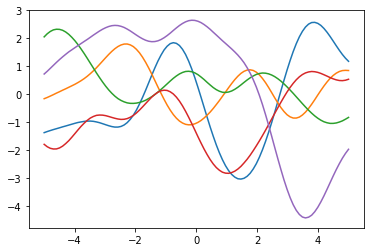

In [188]:
# RBF Kernel
plot_gaussian ()

/home/yashima/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:42: RuntimeWarning: covariance is not symmetric positive-semidefinite.


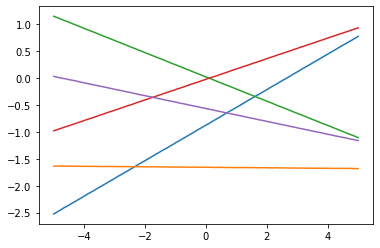

In [191]:
# Linear Kernel
plot_linear()

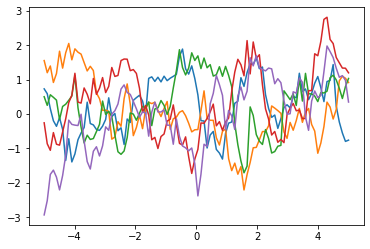

In [189]:
# Exponential Kernel
plot_exponential()

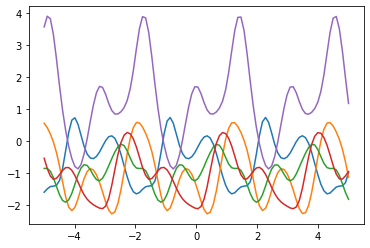

In [190]:
# Periodic Kernel
plot_periodic()